In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('HW3Data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871


#Loading data from CSV file into python. Header not included in CSV file, thereform headers = None. 

In [3]:
genes = np.genfromtxt('Genes.txt', delimiter='\n', dtype = str )
data.columns = np.append('Labels', genes)
data

,Labels,Hsa.3004 H55933 3' UTR 1 203417 H.sapiens mRNA for homologue to yeast ribosomal protein L41.,Hsa.13491 R39465 3' UTR 2a 23933 EUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus),Hsa.13491 R39465 3' UTR 2a 23933 EUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus),Hsa.37254 R85482 3' UTR 2a 180093 SERUM RESPONSE FACTOR (Homo sapiens),"Hsa.541 U14973 gene 1 ""Human ribosomal protein S29 mRNA, complete cds. """,Hsa.20836 R02593 3' UTR 2a 124094 60S ACIDIC RIBOSOMAL PROTEIN P1 (Polyorchis penicillatus),Hsa.1977 T51496 3' UTR 1 71488 60S RIBOSOMAL PROTEIN L37A (HUMAN).,Hsa.44472 H80240 3' UTR 2a 240814 INTER-ALPHA-TRYPSIN INHIBITOR COMPLEX COMPONENT II PRECURSOR (Homo sapiens),Hsa.3087 T65938 3' UTR 1 81639 TRANSLATIONALLY CONTROLLED TUMOR PROTEIN (HUMAN);.,...,Hsa.2618 X67699 gene 1 H.sapiens HE5 mRNA for CDw52 antigen.,Hsa.27285 R70790 3' UTR 2a 142585 GTP:AMP PHOSPHOTRANSFERASE MITOCHONDRIAL (Rattus norvegicus),"Hsa.41260 L11706 gene 1 ""Human hormone-sensitive lipase (LIPE) gene, complete cds. """,Hsa.14822 T90549 3' UTR 2a 110713 P-SELECTIN PRECURSOR (Homo sapiens),Hsa.336 D17390 gene 1 Human mRNA for MDC protein.,"Hsa.984 M33210 gene 1 ""Human colony stimulating factor 1 receptor (CSF1R) gene, exon 5. """,Hsa.35124 H18490 3' UTR 2a 171840 RAN GTPASE ACTIVATING PROTEIN 1 (Mus musculus),Hsa.3952 H40891 3' UTR 2a 175983 NODULATION PROTEIN Q (Azospirillum brasilense),Hsa.32734 R77780 3' UTR 2a 145300 TRANSPOSABLE ELEMENT ACTIVATOR (Zea mays),Hsa.9683 T49647 3' UTR 2a 67762 MYRISTOYLATED ALANINE-RICH C-KINASE SUBSTRATE (Homo sapiens)
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871
5,1,-1.185369,-0.514473,-0.566634,1.224720,0.619244,-0.684713,-0.798129,1.368770,-0.697007,...,0.926855,0.302304,0.302785,-1.170087,-1.189162,0.418884,-2.247347,-0.455263,-1.528083,0.327891
6,0,1.779054,0.423947,0.820696,2.525687,0.666921,0.661346,0.425365,0.165247,1.967905,...,0.284194,-0.555516,-1.455897,-0.240853,0.249138,-0.915572,-0.764530,-0.808293,0.003886,-0.379341
7,1,-0.889638,-0.315453,-0.073131,1.157503,-0.311039,-0.364472,-1.621636,1.192999,0.689805,...,-0.113531,-0.485290,-0.094577,-0.809093,0.453226,-0.009268,-0.872640,-1.730826,0.665384,0.977573
8,0,-0.659694,-0.184388,-0.540022,1.122418,0.562609,-2.988315,-2.349808,-1.325007,-0.017002,...,-0.819396,-0.952811,0.065197,0.985648,0.745522,0.508879,0.846929,0.644346,0.156497,-0.147716
9,1,-1.225801,-0.212615,-0.588923,1.335412,-0.356505,0.354394,0.699607,0.190782,-0.139117,...,1.772469,0.804056,-0.361595,-0.975587,-0.652528,-0.106173,-0.613650,-0.886065,0.645764,0.142760


Loading the Genes.txt file into python, and to as the labels to the features of the dataset. 

In [4]:
x = data.iloc[:,1:].values
y = data.iloc[:,0].values

Separating the data into features and targets. 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=1)

In [6]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (49, 2000)
Y_train shape:  (49,)
X_test shape:  (13, 2000)
Y_test shape:  (13,)


Initialization of holdout method. Data separated into a training and test set. 

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
x_train_trans = scaler.transform(X_train)
x_test_trans = scaler.transform(X_test)

Standard scaler was applied to the dataset to normalize the data before feature selection was done as a part of the preprocessing. 

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
dataset = rfecv.fit(x_train_trans, y_train)

Recursive Feature elimination was done to choose the optimal amount of features in the dataset. 

In [9]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 145


Showing the amount of optimal features determined by the hold out and the RFE methods. 

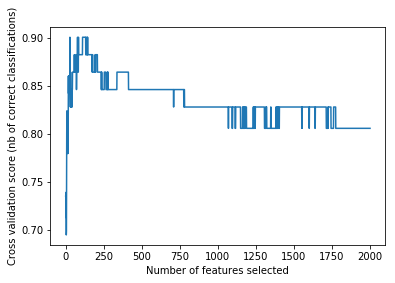

In [10]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Plotting the feature selection

In [11]:
print("Performance Score for Holdout Test Set: %.3f" % dataset.score(x_test_trans,y_test))

Performance Score for Holdout Test Set: 0.846


Performance of the model on the test set. 